In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load Data**

In [92]:
df=pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [93]:
df.shape

(1025, 14)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [95]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Renaming The Columns**

In [96]:
df.rename(columns={
    'age':'Age',
    'sex':'Gender',
    'cp':'ChestPainType',
    'trestbps':'RestingBp',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalach': 'MaxHR',
    'exang': 'ExerciseAngina',
    'oldpeak': 'ST_Depression',
    'slope': 'ST_Slope',
    'ca': 'MajorVessels',
    'thal': 'Thalassemia',
    'target': 'HeartDisease'
}, inplace=True)
print("update dataset:",df.head())
df.columns

update dataset:    Age  Gender  ChestPainType  RestingBp  Cholesterol  FastingBS  RestingECG  \
0   52       1              0        125          212          0           1   
1   53       1              0        140          203          1           0   
2   70       1              0        145          174          0           1   
3   61       1              0        148          203          0           1   
4   62       0              0        138          294          1           1   

   MaxHR  ExerciseAngina  ST_Depression  ST_Slope  MajorVessels  Thalassemia  \
0    168               0            1.0         2             2            3   
1    155               1            3.1         0             0            3   
2    125               1            2.6         0             0            3   
3    161               0            0.0         2             1            3   
4    106               0            1.9         1             3            2   

   HeartDisease  
0   

Index(['Age', 'Gender', 'ChestPainType', 'RestingBp', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'ST_Depression',
       'ST_Slope', 'MajorVessels', 'Thalassemia', 'HeartDisease'],
      dtype='object')

In [97]:
# checking null values
df.isnull().sum()

,0
Age,0
Gender,0
ChestPainType,0
RestingBp,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
ST_Depression,0


In [98]:
# finding duplicate values
df.duplicated().sum()

np.int64(723)

In [99]:
# display duplicate rows
df[df.duplicated()]

,Age,Gender,ChestPainType,RestingBp,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [100]:
# drop duplicate values
df.drop_duplicates(inplace=True)

In [101]:
df.shape

(302, 14)

In [102]:
df.describe()

,Age,Gender,ChestPainType,RestingBp,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [103]:
categorical_cols =['Gender','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','MajorVessels','Thalassemia']
numerical_cols =['Age','Cholesterol','RestingBp', 'MaxHR', 'ST_Depression']

**EDA**

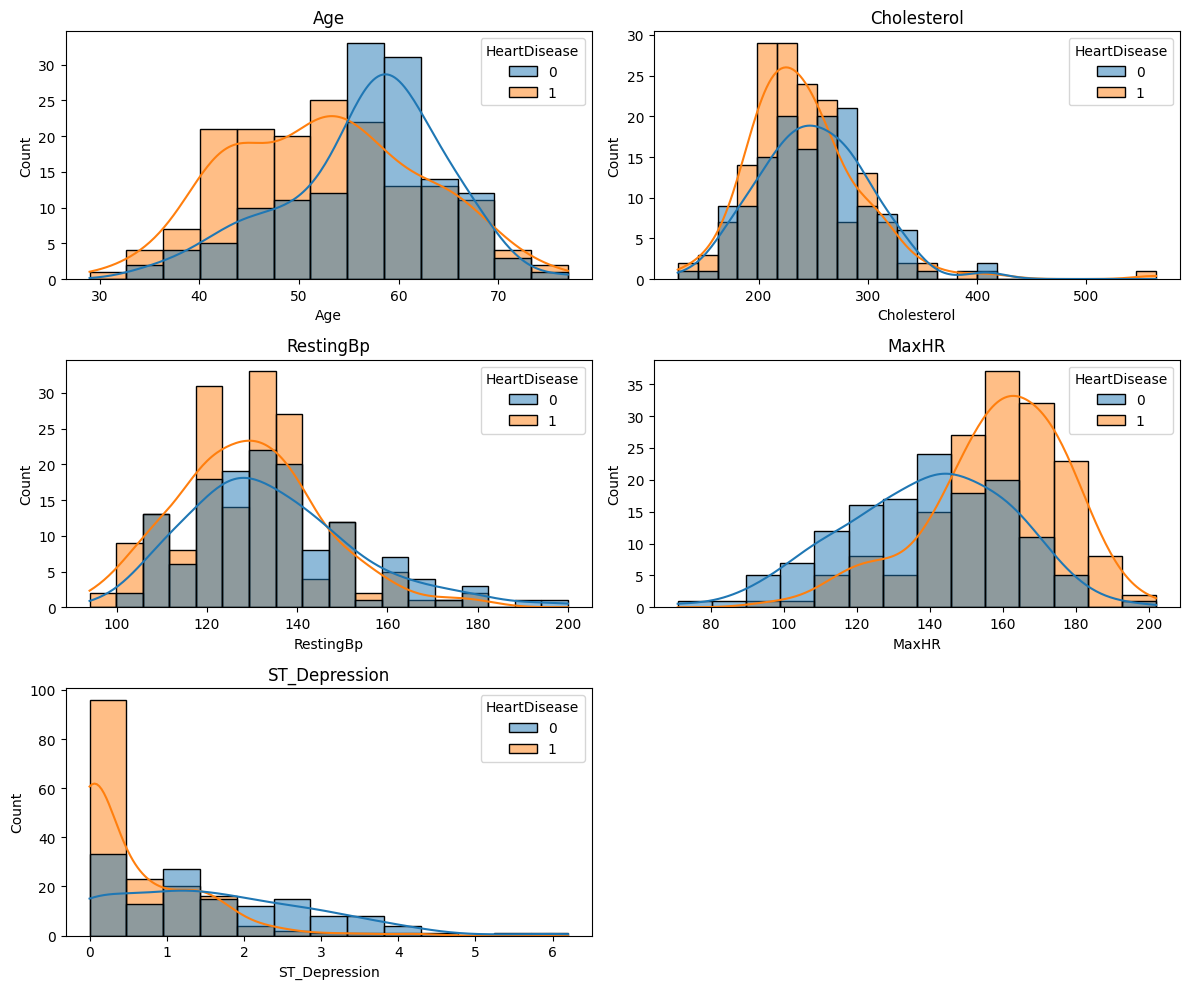

In [104]:
import math
rows=math.ceil(len(numerical_cols)/2)
def plotting(col,i):
  plt.subplot(rows,2,i)
  sns.histplot(data=df,x=col,kde=True,hue='HeartDisease')
  plt.title(col)
plt.figure(figsize=(12,10))
for i,col in enumerate(numerical_cols,1):
  plotting(col,i)
plt.tight_layout()
plt.show()

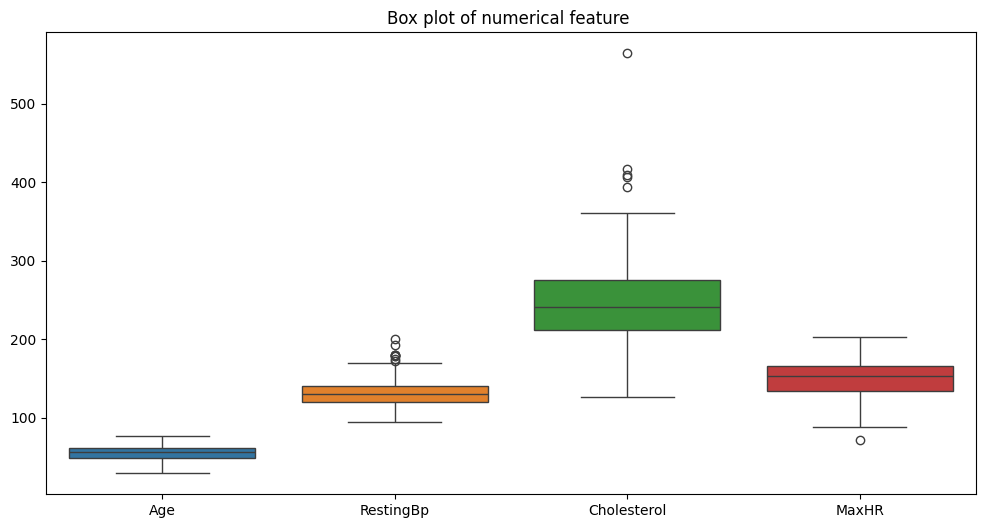

In [105]:
# detect outlier
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age','RestingBp','Cholesterol','MaxHR']])
plt.title("Box plot of numerical feature ")
plt.show()

In [106]:
# handling Outlier
def cap_outliers(df,col):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1

  lower=q1-1.5*iqr
  upper=q3+1.5*iqr

  df[col]=np.where(df[col]>upper,upper,
                   np.where(df[col]<lower,lower,df[col]))

cap_outliers(df,"Cholesterol")

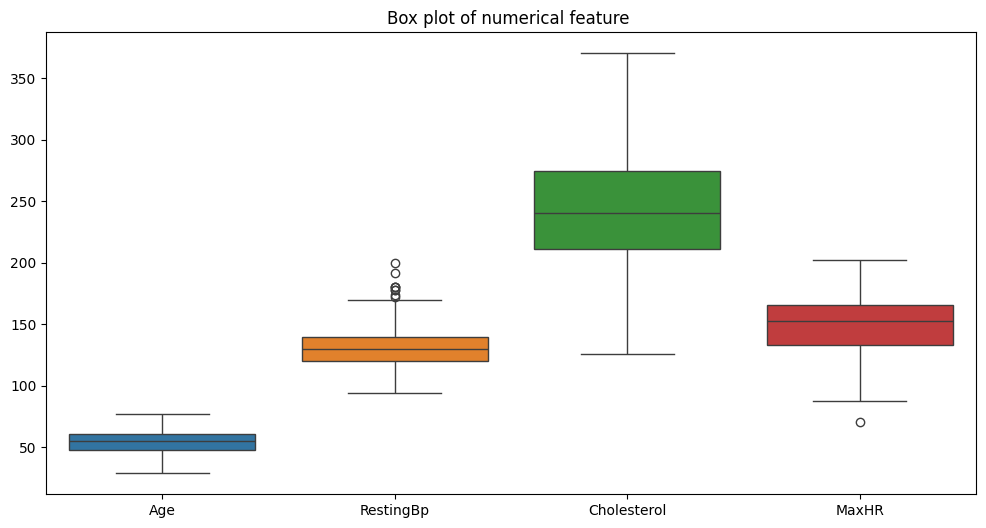

In [107]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age','RestingBp','Cholesterol','MaxHR']])
plt.title("Box plot of numerical feature ")
plt.show()

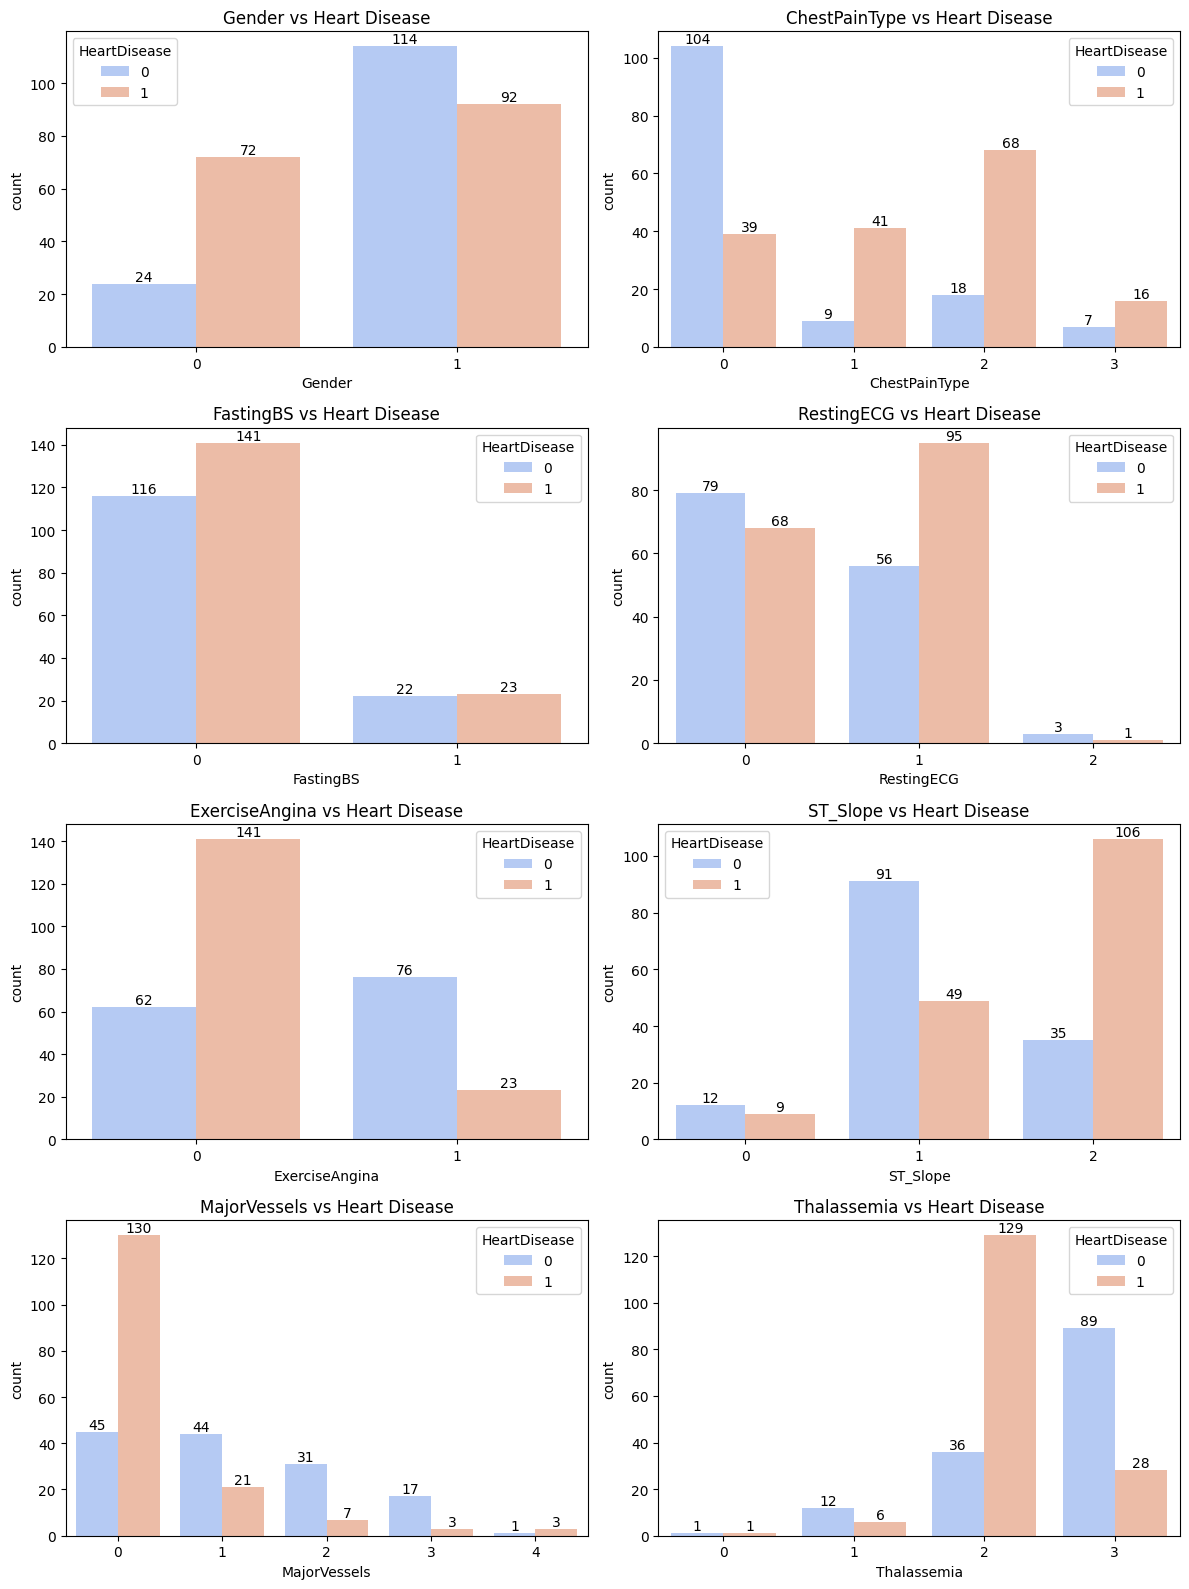

In [108]:
rows=math.ceil(len(categorical_cols)/2)
plt.figure(figsize=(12, rows * 4))
for i,col in enumerate(categorical_cols,1):
  plt.subplot(rows,2,i)
  ax=sns.countplot(data=df,x=col,hue='HeartDisease', palette='coolwarm')

  for i in ax.containers:
    ax.bar_label(i)

  plt.title(f"{col} vs Heart Disease")
  plt.tight_layout()
plt.show()

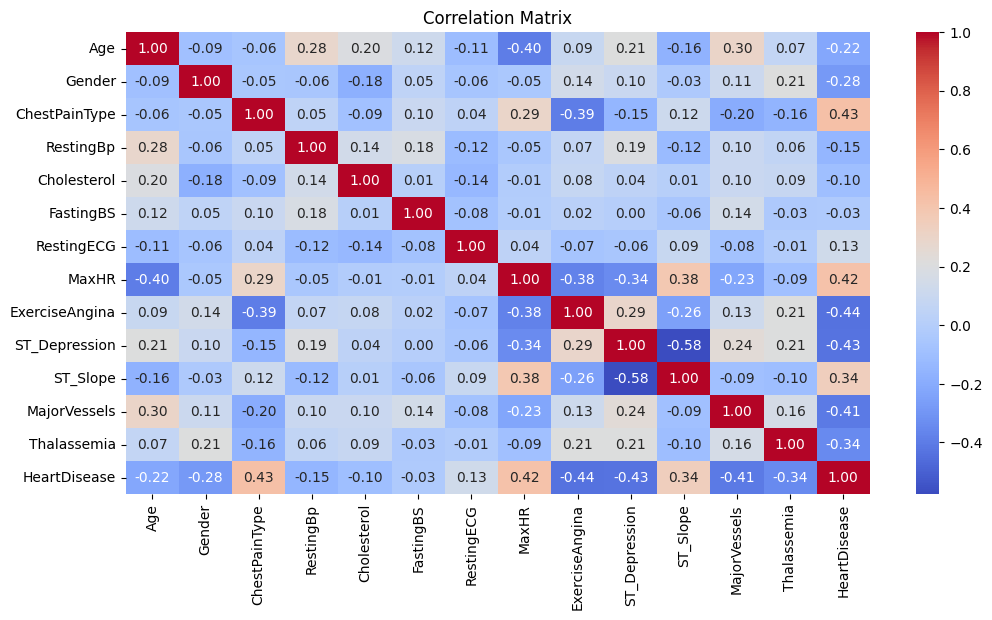

In [109]:
# correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

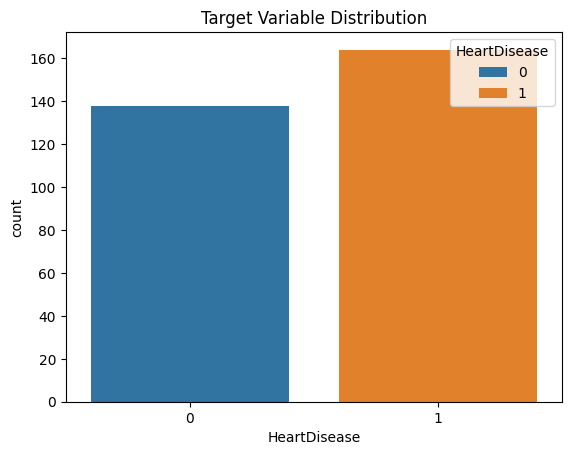

In [110]:
sns.countplot(data=df,x=df['HeartDisease'],hue='HeartDisease')
plt.title("Target Variable Distribution")
plt.show()

**Data Preprocessing**

In [111]:
# separating the feature and target variable
X=df.drop("HeartDisease",axis=1)
y=df['HeartDisease']
X.shape,y.shape

((302, 13), (302,))

Encoding Categorical Data

In [112]:
categorical_cols

['Gender',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'MajorVessels',
 'Thalassemia']

In [113]:
encode_X=pd.get_dummies(X,columns=categorical_cols,drop_first=True,dtype=int)
encode_X.head()

,Age,RestingBp,Cholesterol,MaxHR,ST_Depression,Gender_1,ChestPainType_1,ChestPainType_2,ChestPainType_3,FastingBS_1,...,ExerciseAngina_1,ST_Slope_1,ST_Slope_2,MajorVessels_1,MajorVessels_2,MajorVessels_3,MajorVessels_4,Thalassemia_1,Thalassemia_2,Thalassemia_3
0,52,125,212.0,168,1.0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203.0,155,3.1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174.0,125,2.6,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203.0,161,0.0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294.0,106,1.9,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [114]:
encode_X.shape

(302, 22)

Feature Sacaling

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
encode_X[numerical_cols]=scaler.fit_transform(encode_X[numerical_cols])
encode_X[numerical_cols].head()

,Age,Cholesterol,RestingBp,MaxHR,ST_Depression
0,-0.267966,-0.704039,-0.376556,0.806035,-0.037124
1,-0.157260,-0.893880,0.478910,0.237495,1.773958
2,1.724733,-1.505591,0.764066,-1.074521,1.342748
3,0.728383,-0.893880,0.935159,0.499898,-0.899544
4,0.839089,1.025627,0.364848,-1.905464,0.739054


In [116]:
encode_X

,Age,RestingBp,Cholesterol,MaxHR,ST_Depression,Gender_1,ChestPainType_1,ChestPainType_2,ChestPainType_3,FastingBS_1,...,ExerciseAngina_1,ST_Slope_1,ST_Slope_2,MajorVessels_1,MajorVessels_2,MajorVessels_3,MajorVessels_4,Thalassemia_1,Thalassemia_2,Thalassemia_3
0,-0.267966,-0.376556,-0.704039,0.806035,-0.037124,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,0.478910,-0.893880,0.237495,1.773958,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,0.764066,-1.505591,-1.074521,1.342748,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,0.935159,-0.893880,0.499898,-0.899544,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0.364848,1.025627,-1.905464,0.739054,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,-0.661712,-0.725132,-1.511859,0.394086,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,-1.346085,-2.201676,1.112172,-0.382092,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,-0.205463,0.202981,0.499898,-0.899544,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1.619532,0.582664,-1.074521,-0.899544,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


Split data

In [117]:
x_train,x_test,y_train,y_test = train_test_split(
    encode_X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y

)
print("training data shape:",x_train.shape)
print("testing data shape:",x_test.shape)

training data shape: (241, 22)
testing data shape: (61, 22)


**Train Model**

In [127]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [128]:
results=[]

In [129]:
mdoels={
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "SVC":SVC(),
    "GaussianNB":GaussianNB()
}

In [130]:
for name,model in mdoels.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  results.append({
      "Model":name,
      "Accuracy":accuracy
  })

In [131]:
pd.DataFrame(results)

,Model,Accuracy
0,LogisticRegression,0.852459
1,KNeighborsClassifier,0.803279
2,DecisionTreeClassifier,0.688525
3,RandomForestClassifier,0.803279
4,SVC,0.803279
5,GaussianNB,0.836066


Ensemble

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [137]:
models={
    'GradientBoosting':GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier(),
}

In [138]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    cl_rep=classification_report(y_test,y_pred)
    print(f"{name}:{acc}")
    print('Classification Report:')
    print(f"{cl_rep}")

GradientBoosting:0.7704918032786885
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

XGBClassifier:0.7704918032786885
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.83      0.73      0.77        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



# |Hyperparameter Tuning

In [139]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression(max_iter=1000)

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr_grid = GridSearchCV(
    log_reg,
    lr_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

lr_grid.fit(x_train, y_train)
best_lr = lr_grid.best_estimator_

print("Best Logistic Params:", lr_grid.best_params_)


Best Logistic Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [141]:
knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(
    knn,
    knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

knn_grid.fit(x_train, y_train)
best_knn = knn_grid.best_estimator_

print("Best KNN Params:", knn_grid.best_params_)
print("Best sore",knn_grid.best_score_)

Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best sore 0.8215986394557822


In [142]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    xgb,
    xgb_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(x_train, y_train)
best_xgb = xgb_random.best_estimator_

print("Best XGB Params:", xgb_random.best_params_)


Best XGB Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


**Evaluate**


Logistic Regression
Accuracy: 0.8524590163934426
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:


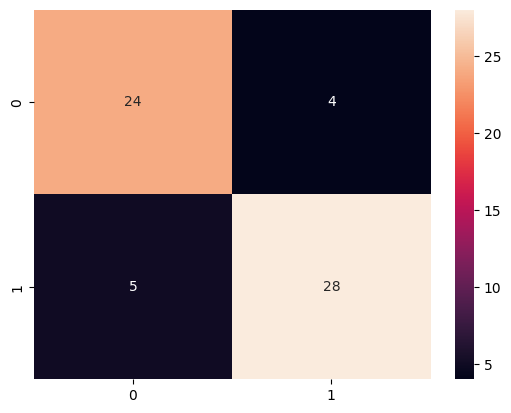


KNN
Accuracy: 0.8524590163934426
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.90      0.82      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Confusion Matrix:


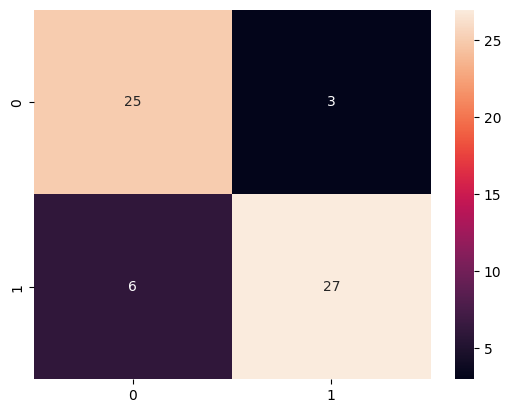


XGBoost
Accuracy: 0.7704918032786885
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

Confusion Matrix:


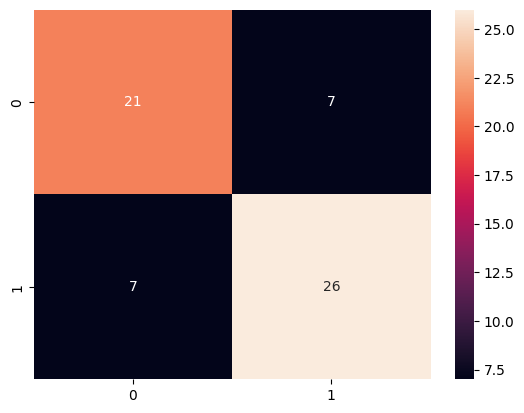

In [145]:
models = {
    "Logistic Regression": best_lr,
    "KNN": best_knn,
    "XGBoost": best_xgb
}

results = []

for name, model in models.items():
    y_pred = model.predict(x_test)


    acc = accuracy_score(y_test, y_pred)


    results.append([name, acc])

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm=confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.show()
    print("="*200)

In [146]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy"]
)
results_df

,Model,Accuracy
0,Logistic Regression,0.852459
1,KNN,0.852459
2,XGBoost,0.770492


Save the Logistic Regression MOdel

In [147]:
import pickle
with open('heart_disease_prediction_model.pkl','wb') as f:
  pickle.dump((best_lr,scaler),f)
print("Model Saved Succesfully!!")

Model Saved Succesfully!!
